In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

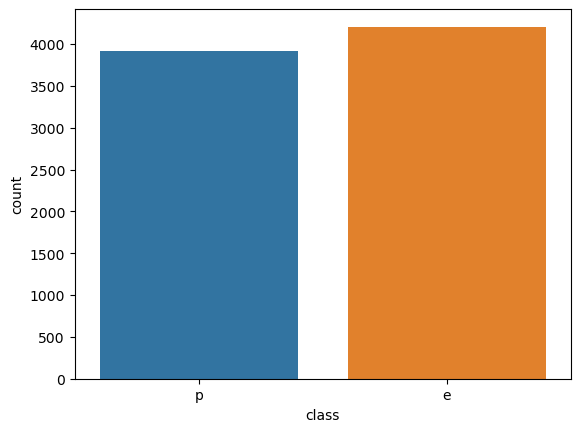

In [4]:
sns.countplot(data=df,x='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
feat_uni=df.describe().transpose().sort_values('unique')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'veil-type'),
  Text(1, 0, 'class'),
  Text(2, 0, 'bruises'),
  Text(3, 0, 'gill-attachment'),
  Text(4, 0, 'gill-spacing'),
  Text(5, 0, 'gill-size'),
  Text(6, 0, 'stalk-shape'),
  Text(7, 0, 'ring-number'),
  Text(8, 0, 'cap-surface'),
  Text(9, 0, 'veil-color'),
  Text(10, 0, 'stalk-surface-below-ring'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'ring-type'),
  Text(13, 0, 'stalk-root'),
  Text(14, 0, 'cap-shape'),
  Text(15, 0, 'population'),
  Text(16, 0, 'habitat'),
  Text(17, 0, 'stalk-color-above-ring'),
  Text(18, 0, 'stalk-color-below-ring'),
  Text(19, 0, 'odor'),
  Text(20, 0, 'spore-print-color'),
  Text(21, 0, 'cap-color'),
  Text(22, 0, 'gill-color')])

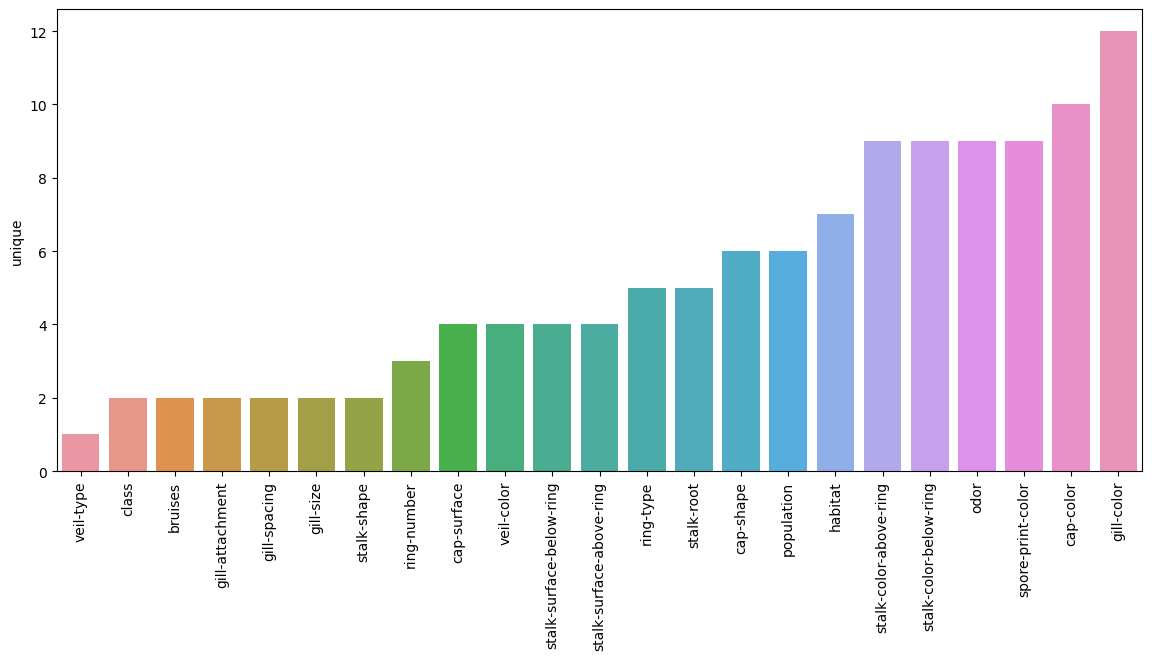

In [14]:
plt.figure(figsize=(14,6))
sns.barplot(data=feat_uni, x=feat_uni.index, y='unique')
plt.xticks(rotation=90)

In [15]:
X=df.drop('class', axis=1)

In [16]:
y=df['class']

In [20]:
from sklearn.model_selection import train_test_split
X=pd.get_dummies(data=X,drop_first=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=101)

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
ada = AdaBoostClassifier(n_estimators=1)

In [24]:
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [25]:
predic=ada.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
confusion_matrix(y_test,predic)

array([[529, 126],
       [ 23, 541]], dtype=int64)

In [30]:
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [31]:
ada.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
ada.feature_importances_.argmax()

22

In [44]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

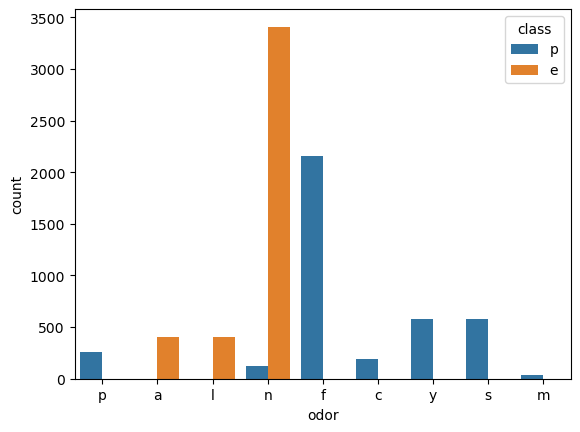

In [46]:
sns.countplot(data=df,x='odor',hue='class')

In [59]:
len(X.columns)

95

In [58]:
error=[]
for i in range(1,96):
    ada = AdaBoostClassifier(n_estimators=i)
    ada.fit(X_train, y_train)
    predic=ada.predict(X_test)
    error.append(1-accuracy_score(y_test,predic))

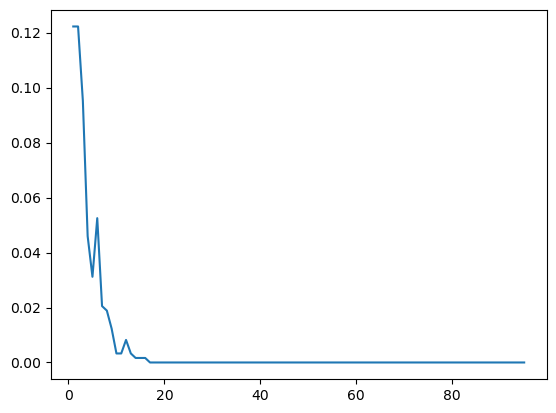

In [60]:
plt.plot(range(1,96),error)

In [61]:
ada.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [66]:
feats=pd.DataFrame(index=X.columns, data=ada.feature_importances_,columns=['Importances'])

In [67]:
imp_feature=feats[feats['Importances']!=0]

In [70]:
imp_feature

,Importances
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'cap-color_c'),
  Text(1, 0, 'cap-color_n'),
  Text(2, 0, 'cap-color_w'),
  Text(3, 0, 'bruises_t'),
  Text(4, 0, 'odor_c'),
  Text(5, 0, 'odor_f'),
  Text(6, 0, 'odor_n'),
  Text(7, 0, 'odor_p'),
  Text(8, 0, 'gill-spacing_w'),
  Text(9, 0, 'gill-size_n'),
  Text(10, 0, 'stalk-shape_t'),
  Text(11, 0, 'stalk-root_b'),
  Text(12, 0, 'stalk-surface-above-ring_k'),
  Text(13, 0, 'stalk-surface-below-ring_y'),
  Text(14, 0, 'stalk-color-below-ring_n'),
  Text(15, 0, 'stalk-color-below-ring_w'),
  Text(16, 0, 'ring-number_t'),
  Text(17, 0, 'spore-print-color_r'),
  Text(18, 0, 'spore-print-color_w'),
  Text(19, 0, 'population_c'),
  Text(20, 0, 'population_v'),
  Text(21, 0, 'habitat_w')])

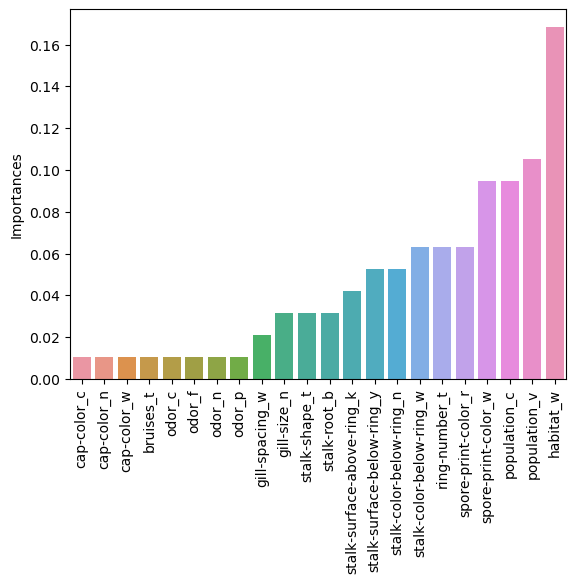

In [78]:
plt.plot(figsize=(14,6))
sns.barplot(data=imp_feature.sort_values('Importances'),x=imp_feature.index,y='Importances')
plt.xticks(rotation=90)

In [79]:
ada = AdaBoostClassifier(n_estimators=18)
ada.fit(X_train, y_train)
predic=ada.predict(X_test)
feats=pd.DataFrame(index=X.columns, data=ada.feature_importances_,columns=['Importances'])

In [81]:
imp_feature=feats[feats['Importances']!=0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'bruises_t'),
  Text(1, 0, 'odor_c'),
  Text(2, 0, 'odor_f'),
  Text(3, 0, 'odor_n'),
  Text(4, 0, 'odor_p'),
  Text(5, 0, 'gill-size_n'),
  Text(6, 0, 'stalk-surface-above-ring_k'),
  Text(7, 0, 'stalk-surface-below-ring_y'),
  Text(8, 0, 'stalk-color-below-ring_n'),
  Text(9, 0, 'spore-print-color_r'),
  Text(10, 0, 'spore-print-color_w'),
  Text(11, 0, 'population_c'),
  Text(12, 0, 'population_v')])

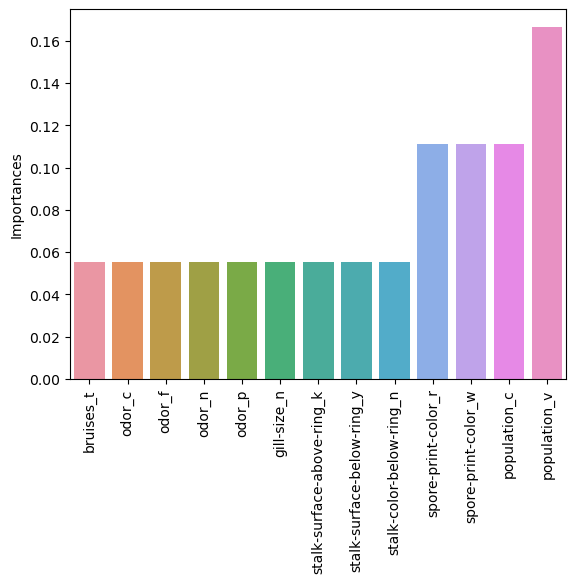

In [83]:
plt.plot(figsize=(14,6))
sns.barplot(data=imp_feature.sort_values('Importances'),x=imp_feature.index,y='Importances')
plt.xticks(rotation=90)